In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [4]:
!wget https://downloads.tatoeba.org/audio/tatoeba_audio_eng.zip

--2020-01-02 12:38:00--  https://downloads.tatoeba.org/audio/tatoeba_audio_eng.zip
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4116471982 (3.8G) [application/zip]
Saving to: ‘tatoeba_audio_eng.zip’

tatoeba_audio_eng.z 100%[===================>]   3.83G  19.4MB/s    in 3m 51s  

2020-01-02 12:41:52 (17.0 MB/s) - ‘tatoeba_audio_eng.zip’ saved [4116471982/4116471982]



In [0]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/tatoeba_audio_eng.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data/tatoeba')
zip_ref.close()

In [0]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [80]:
import librosa
audio_path = '/content/sample_data/tatoeba/tatoeba_audio_eng/audio/BE/17348.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(48952,) 22050


In [0]:
#librosa.load(audio_path, sr=44100)
S = librosa.feature.melspectrogram(y=x, sr=sr , fmax = sr/2)

In [82]:
import IPython.display as ipd
ipd.Audio(audio_path)

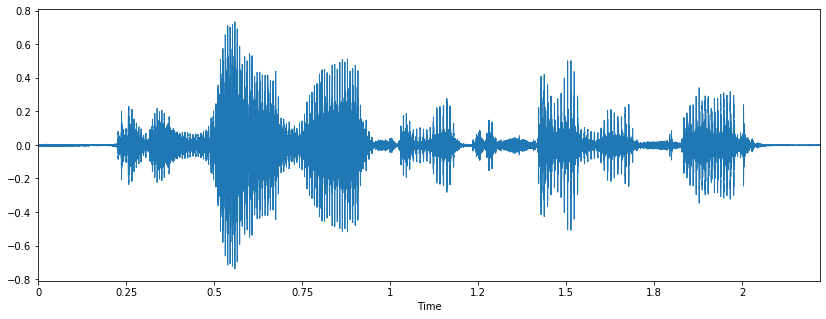

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

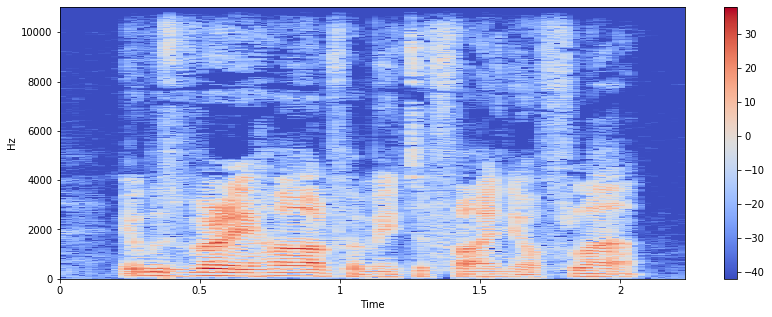

In [84]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

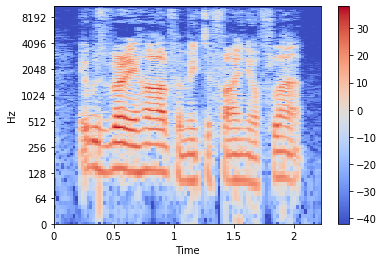

In [85]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [86]:
cd /content

/content


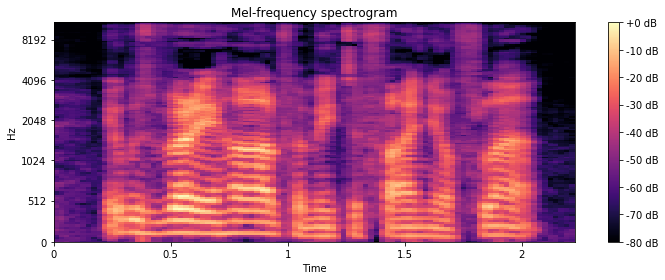

In [87]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
#plt.gca().invert_yaxis()
#print(S_dB)
#plt.imsave("test.png" , S_dB)
plt.close()

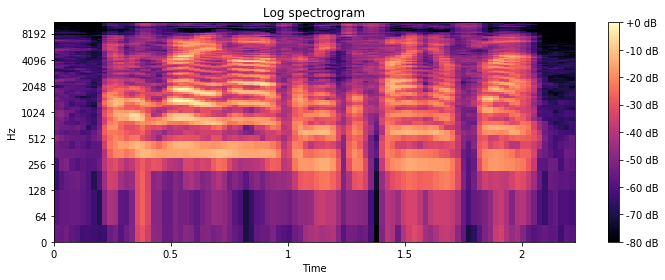

In [88]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='log', sr=sr, fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Log spectrogram')
plt.tight_layout()
plt.show()
#plt.gca().invert_yaxis()
#print(S_dB)

#plt.imsave("test1.png" , S_dB)
plt.close()

In [89]:
import matplotlib.pyplot as plt
import librosa.display
import numpy
import skimage

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)

mels = librosa.feature.melspectrogram(y=x, sr=sr,hop_length = 512,
    n_mels = 128
)
mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. make black==more energy

    # save as PNG
skimage.io.imsave('test.png', img)


<Figure size 720x288 with 0 Axes>

In [90]:
import librosa
audio_path = '/content/sample_data/tatoeba/tatoeba_audio_eng/audio/CK/1496.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(101430,) 22050


In [0]:
#librosa.load(audio_path, sr=44100)
U = librosa.feature.melspectrogram(y=x, sr=sr , fmax = sr/2)

In [92]:
import IPython.display as ipd
ipd.Audio(audio_path)

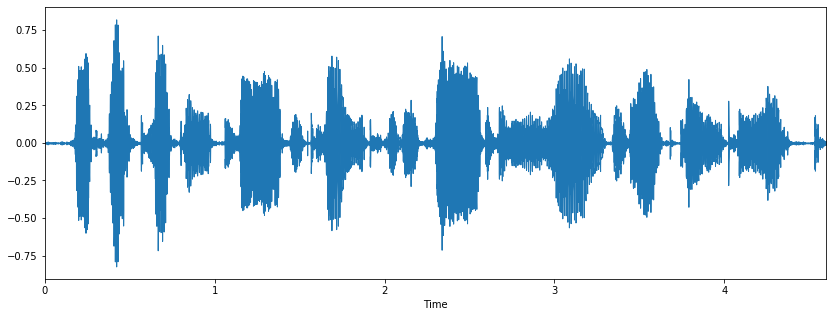

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

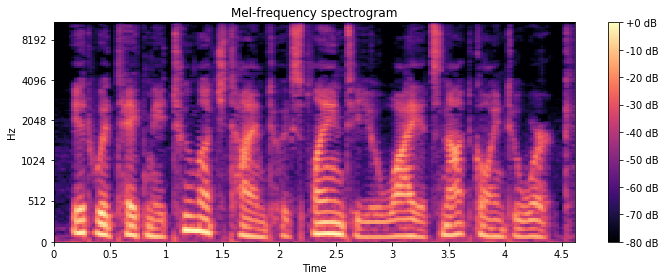

In [94]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(U, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
#plt.gca().invert_yaxis()
#print(S_dB)
#plt.imsave("test.png" , S_dB)
plt.close()

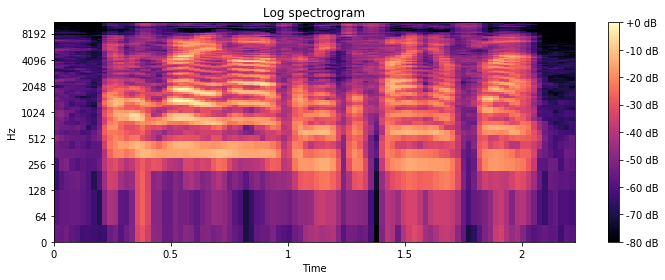

In [95]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='log', sr=sr, fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Log spectrogram')
plt.tight_layout()
plt.show()
#plt.gca().invert_yaxis()
#print(S_dB)

#plt.imsave("test1.png" , S_dB)
plt.close()

In [96]:
import matplotlib.pyplot as plt
import librosa.display
import numpy
import skimage

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)

mels = librosa.feature.melspectrogram(y=x, sr=sr,hop_length = 512,
    n_mels = 128
)
mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. make black==more energy

    # save as PNG
skimage.io.imsave('test1.png', img)


<Figure size 720x288 with 0 Axes>